In [1]:
"""
FEniCS tutorial demo program: Incompressible Navier-Stokes equations
for channel flow (Poisseuille) on the unit square using the
Incremental Pressure Correction Scheme (IPCS).
  u' + u . nabla(u)) - div(sigma(u, p)) = f
                                 div(u) = 0
"""

from __future__ import print_function
from fenics import *
import numpy as np

In [2]:
T = 10.0           # final time
num_steps = 500    # number of time steps
dt = T / num_steps # time step size
mu = 1             # kinematic viscosity
rho = 1            # density

In [3]:
# Create mesh and define function spaces
mesh = UnitSquareMesh(16, 16)
V = VectorFunctionSpace(mesh, 'P', 2)
Q = FunctionSpace(mesh, 'P', 1)

# Define boundaries
inflow  = 'near(x[0], 0)'
outflow = 'near(x[0], 1)'
walls   = 'near(x[1], 0) || near(x[1], 1)'

# Define boundary conditions
bcu_noslip  = DirichletBC(V, Constant((0, 0)), walls)
bcp_inflow  = DirichletBC(Q, Constant(8), inflow)
bcp_outflow = DirichletBC(Q, Constant(0), outflow)
bcu = [bcu_noslip]
bcp = [bcp_inflow, bcp_outflow]

Calling FFC just-in-time (JIT) compiler, this may take some time.


In [4]:
# Define trial and test functions
u = TrialFunction(V)
v = TestFunction(V)
p = TrialFunction(Q)
q = TestFunction(Q)

# Define functions for solutions at previous and current time steps
u_n = Function(V)
u_  = Function(V)
p_n = Function(Q)
p_  = Function(Q)

In [5]:
# Define expressions used in variational forms
U   = 0.5*(u_n + u)
n   = FacetNormal(mesh)
f   = Constant((0, 0))
k   = Constant(dt)
mu  = Constant(mu)
rho = Constant(rho)

In [6]:
# Define strain-rate tensor
def epsilon(u):
    return sym(nabla_grad(u))

# Define stress tensor
def sigma(u, p):
    return 2*mu*epsilon(u) - p*Identity(len(u))

# Define variational problem for step 1
F1 = rho*dot((u - u_n) / k, v)*dx + rho*dot(dot(u_n, nabla_grad(u_n)), v)*dx \
   + inner(sigma(U, p_n), epsilon(v))*dx + dot(p_n*n, v)*ds - dot(mu*nabla_grad(U)*n, v)*ds \
   - dot(f, v)*dx
a1 = lhs(F1)
L1 = rhs(F1)

# Define variational problem for step 2
a2 = dot(nabla_grad(p), nabla_grad(q))*dx
L2 = dot(nabla_grad(p_n), nabla_grad(q))*dx - (1/k)*div(u_)*q*dx

# Define variational problem for step 3
a3 = dot(u, v)*dx
L3 = dot(u_, v)*dx - k*dot(nabla_grad(p_ - p_n), v)*dx

# Assemble matrices
A1 = assemble(a1)
A2 = assemble(a2)
A3 = assemble(a3)

# Apply boundary conditions to matrices
[bc.apply(A1) for bc in bcu]
[bc.apply(A2) for bc in bcp]


Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


/Users/edwardtang/anaconda3/envs/fenics2018/lib/python3.7/site-packages/ffc/uflacs/analysis/dependencies.py:61: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  active[targets] = 1


Calling FFC just-in-time (JIT) compiler, this may take some time.


/Users/edwardtang/anaconda3/envs/fenics2018/lib/python3.7/site-packages/ffc/uflacs/analysis/dependencies.py:61: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  active[targets] = 1


Calling FFC just-in-time (JIT) compiler, this may take some time.


/Users/edwardtang/anaconda3/envs/fenics2018/lib/python3.7/site-packages/ffc/uflacs/analysis/dependencies.py:61: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  active[targets] = 1


[None, None]

t = 0.02: error = 0.84
max u: 0.16000000000000336
t = 0.04: error = 0.684
max u: 0.315688161444561
t = 0.06: error = 0.548
max u: 0.45196701833303676
t = 0.08: error = 0.444
max u: 0.5559329370127698
t = 0.10: error = 0.365
max u: 0.6348216978885726
t = 0.12: error = 0.3
max u: 0.7004586647377301
t = 0.14: error = 0.246
max u: 0.7544700578410994
t = 0.16: error = 0.202
max u: 0.7984010777240862
t = 0.18: error = 0.165
max u: 0.8347367548032502
t = 0.20: error = 0.136
max u: 0.864370379847643
t = 0.22: error = 0.111
max u: 0.888757133064951
t = 0.24: error = 0.0913
max u: 0.9087461792894155
t = 0.26: error = 0.0749
max u: 0.9251289439389457
t = 0.28: error = 0.0614
max u: 0.93859590808182
t = 0.30: error = 0.0504
max u: 0.9496145471152867
t = 0.32: error = 0.0413
max u: 0.9586784136388665
t = 0.34: error = 0.0339
max u: 0.9660952072888978
t = 0.36: error = 0.0278
max u: 0.972191915819923
t = 0.38: error = 0.0228
max u: 0.977186437733589
t = 0.40: error = 0.0187
max u: 0.9812861185457543

t = 3.16: error = 5.57e-05
max u: 1.0000016534009515
t = 3.18: error = 5.49e-05
max u: 1.0000042081162483
t = 3.20: error = 5.42e-05
max u: 1.000001626884104
t = 3.22: error = 5.33e-05
max u: 1.000004159110662
t = 3.24: error = 5.27e-05
max u: 1.0000016006576329
t = 3.26: error = 5.19e-05
max u: 1.0000041103075143
t = 3.28: error = 5.13e-05
max u: 1.0000015747212156
t = 3.30: error = 5.05e-05
max u: 1.000004061715707
t = 3.32: error = 4.99e-05
max u: 1.0000015490744154
t = 3.34: error = 4.91e-05
max u: 1.000004013343713
t = 3.36: error = 4.86e-05
max u: 1.000001523716683
t = 3.38: error = 4.78e-05
max u: 1.0000039651996018
t = 3.40: error = 4.73e-05
max u: 1.0000014986473593
t = 3.42: error = 4.66e-05
max u: 1.000003917291065
t = 3.44: error = 4.61e-05
max u: 1.000001473865679
t = 3.46: error = 4.54e-05
max u: 1.0000038696254345
t = 3.48: error = 4.49e-05
max u: 1.0000014493707807
t = 3.50: error = 4.42e-05
max u: 1.0000038222097103
t = 3.52: error = 4.37e-05
max u: 1.0000014251617027


t = 6.40: error = 1.07e-05
max u: 1.000000542833696
t = 6.42: error = 1.06e-05
max u: 1.0000012355704775
t = 6.44: error = 1.05e-05
max u: 1.000000540993016
t = 6.46: error = 1.04e-05
max u: 1.0000012124005109
t = 6.48: error = 1.04e-05
max u: 1.0000005391315385
t = 6.50: error = 1.03e-05
max u: 1.0000011895279894
t = 6.52: error = 1.02e-05
max u: 1.000000537249812
t = 6.54: error = 1.01e-05
max u: 1.0000011669506321
t = 6.56: error = 1.01e-05
max u: 1.0000005353483798
t = 6.58: error = 9.98e-06
max u: 1.000001144666141
t = 6.60: error = 9.93e-06
max u: 1.0000005334277795
t = 6.62: error = 9.84e-06
max u: 1.0000011226721974
t = 6.64: error = 9.79e-06
max u: 1.0000005314885434
t = 6.66: error = 9.7e-06
max u: 1.000001100966466
t = 6.68: error = 9.65e-06
max u: 1.0000005295311967
t = 6.70: error = 9.56e-06
max u: 1.0000010795465992
t = 6.72: error = 9.52e-06
max u: 1.0000005275562593
t = 6.74: error = 9.43e-06
max u: 1.000001058410232
t = 6.76: error = 9.38e-06
max u: 1.000000525564243
t

t = 9.60: error = 3.95e-06
max u: 1.0000003658095056
t = 9.62: error = 3.92e-06
max u: 1.0000002966648154
t = 9.64: error = 3.91e-06
max u: 1.0000003635718995
t = 9.66: error = 3.88e-06
max u: 1.0000002935888141
t = 9.68: error = 3.86e-06
max u: 1.0000003613399866
t = 9.70: error = 3.83e-06
max u: 1.0000002905436782
t = 9.72: error = 3.82e-06
max u: 1.0000003591139124
t = 9.74: error = 3.79e-06
max u: 1.000000287529135
t = 9.76: error = 3.78e-06
max u: 1.0000003568938152
t = 9.78: error = 3.75e-06
max u: 1.0000002845449194
t = 9.80: error = 3.74e-06
max u: 1.0000003546798286
t = 9.82: error = 3.71e-06
max u: 1.0000002815907647
t = 9.84: error = 3.7e-06
max u: 1.0000003524720869
t = 9.86: error = 3.67e-06
max u: 1.0000002786664053
t = 9.88: error = 3.66e-06
max u: 1.000000350270717
t = 9.90: error = 3.63e-06
max u: 1.00000027577158
t = 9.92: error = 3.62e-06
max u: 1.0000003480758448
t = 9.94: error = 3.6e-06
max u: 1.000000272906025
t = 9.96: error = 3.58e-06
max u: 1.000000345887592
t

NameError: name 'interactive' is not defined

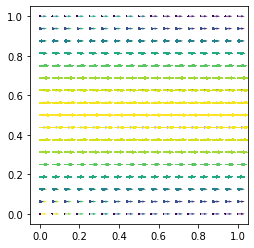

In [9]:
# Time-stepping
t = 0
for n in range(num_steps):

    # Update current time
    t += dt

    # Step 1: Tentative velocity step
    b1 = assemble(L1)
    [bc.apply(b1) for bc in bcu]
    solve(A1, u_.vector(), b1)

    # Step 2: Pressure correction step
    b2 = assemble(L2)
    [bc.apply(b2) for bc in bcp]
    solve(A2, p_.vector(), b2)

    # Step 3: Velocity correction step
    b3 = assemble(L3)
    solve(A3, u_.vector(), b3)

    # Plot solution
    plot(u_)

    # Compute error
    u_e = Expression(('4*x[1]*(1.0 - x[1])', '0'), degree=2)
    u_e = interpolate(u_e, V)
    error = np.abs(u_e.vector().get_local() - u_.vector().get_local()).max()
    print('t = %.2f: error = %.3g' % (t, error))
    print('max u:', u_.vector().get_local().max())

    # Update previous solution
    u_n.assign(u_)
    p_n.assign(p_)